In [2]:
import pandas as pd 
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("fake.csv")


In [4]:
X = data[["Feature1", "Feature2"]].values
y = data["Class"].values

In [5]:
class1 = X[y == 0]
class2 = X[y == 1]

In [6]:
mean1, cov1 = np.mean(class1, axis=0), np.cov(class1, rowvar=False)
mean2, cov2 = np.mean(class2, axis=0), np.cov(class2, rowvar=False)

In [7]:
prior1 = prior2 = 0.5

In [8]:
def classify(x):
    p1 = multivariate_normal.pdf(x, mean=mean1, cov=cov1) * prior1
    p2 = multivariate_normal.pdf(x, mean=mean2, cov=cov2) * prior2
    return 0 if p1 > p2 else 1

In [9]:
y_pred = np.array([classify(x) for x in X])

In [10]:
accuracy = np.mean(y_pred == y)
print("Classification Accuracy:", round(accuracy * 100, 2), "%")

Classification Accuracy: 98.5 %


In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([classify(x) for x in grid])
Z = Z.reshape(xx.shape)

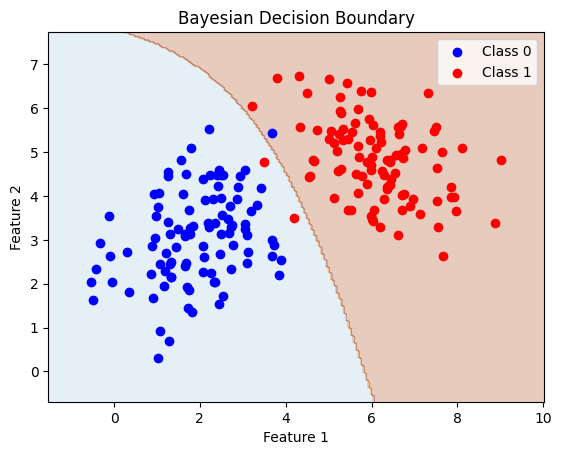

In [12]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 0')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 1')
plt.title("Bayesian Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()